## Unsupervised Learning with Python - Part 3
> Part 3 - Decorrelating Your Data and Dimension Reduction
## Visualizing the PCA transformation
Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form
- More efficient storage and computation
- Remove less-informative 'noise' features
- ... which cause big problems for supervised learning tasks like regression and classification.

**Principal Component Analysis**
- Fundamental dimension reduction technique
- 1st step: decorrelation
- 2nd step: reduces dimension

**1st step: PCA aligns data with axes**
- Rotates data sample to be aligned with axes
- Shifts data sample so they mean 0
- No information is lost
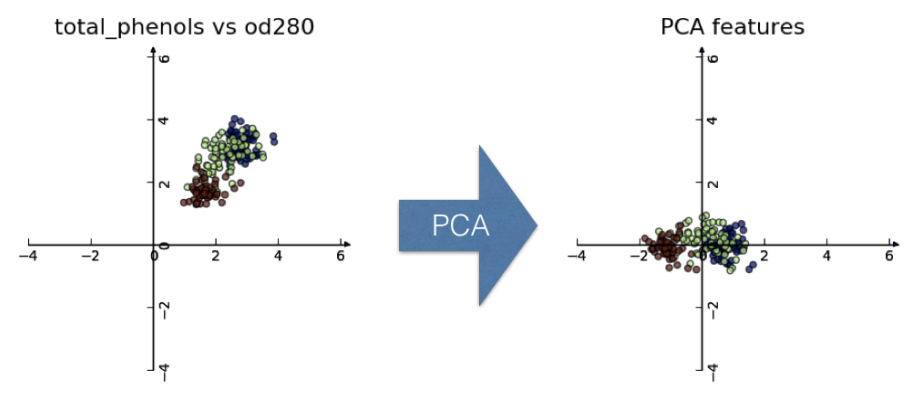

**PCA follows fit/transform pattern**
- PCA is a scikit-learn component like KMeans and StandardScaler
- fit() learns the transformation from given data
- transform() applies the learned transformation
- transformation() can also be applied to new data

**PCA features**
- Rows of transformed correspond to samples
- Columns of transform are the "PCA features"
- Row gives PCA feature values of corresponding sample

**Principal Components**
- "Principal Components" = direction of variance
- PCA aligns principal components with the axes
- Available as `components_` attributes of PCA object
- Each row defines displacement from mean

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

### Exerice - Correlated data in nature
You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [2]:
grains = pd.read_csv('./datasets/Grains/seeds-width-vs-length.csv', header=None)

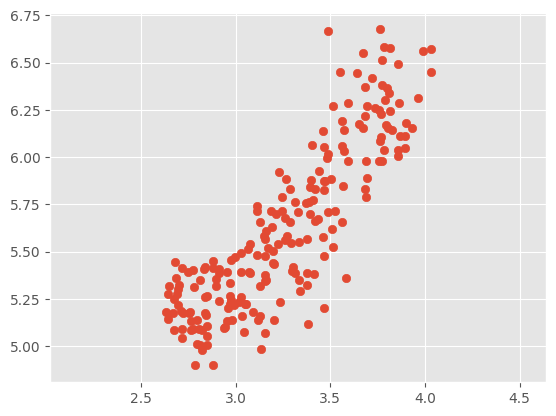

0.8604149377143466


In [3]:
# Perform the necessary imports
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[0]

# Assign the 1st column of grains: length
length = grains[1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

### Exercise - Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

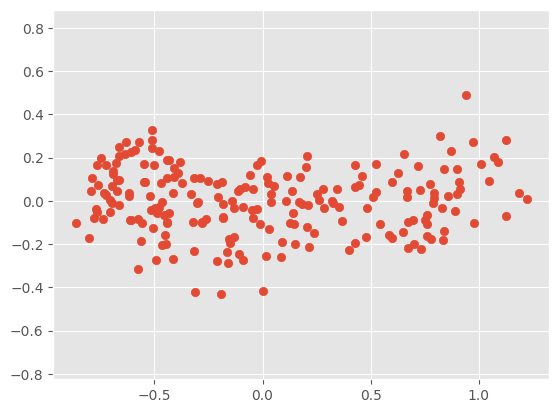

Correlation: -1.1883227564437815e-17 P-value: 0.9999999999999976


In [4]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print('Correlation:',correlation, 'P-value:',pvalue)

In [5]:
from sklearn.decomposition import PCA

# Sample dataset with 3 features and 5 data points
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9],
                 [10, 11, 12],
                 [13, 14, 15]])

# Initialize PCA with 2 components
pca = PCA(n_components=3)

# Fit the PCA model to the data
pca.fit(data)

# Access the principal components
components = pca.components_
components

array([[-0.57735027, -0.57735027, -0.57735027],
       [-0.81649658,  0.40824829,  0.40824829],
       [-0.        ,  0.70710678, -0.70710678]])

In [6]:
grains

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658
...,...,...
205,2.981,5.137
206,2.795,5.140
207,3.232,5.236
208,2.836,5.175


## Intrinsic dimension
Intrinsic dimension
- Intrinsic dimension = number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- What is the most representative of the samples
- Can be detected with PCA

**PCA identifies intrinsic dimension**
- Scatter plots work only if samples have 2 or 3 features
- PCA identifies intrinsic dimension when sample have any number of features
- Intrinsic dimension: number of PCA features with significant variance

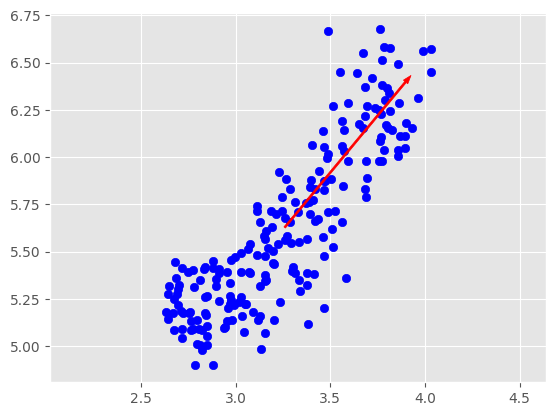

[0.63910027 0.76912343]


In [7]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[0], grains[1], color='blue')

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()
print(first_pc)

### Exercise - Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [8]:
samples = pd.read_csv('./datasets/samples_fish.csv', index_col=0)
samples.head()

,0,1,2,3,4,5
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


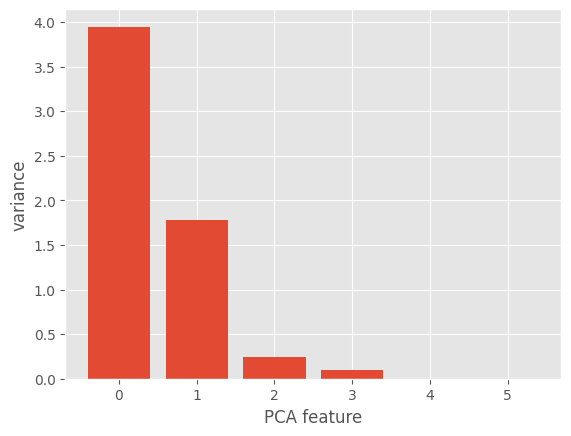

In [9]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## Dimension Reduction
Dimension reduction:
- Represent same data, using less features
- Important part of machine-learning pipelines
- Can be performed using PCA

**Dimension reduction with PCA**
- PCA features are in decreasing order of variance
- Assumes the low variance features are "noise"
- ... and high variance features are informative
- Steps:
    - Specify how many features to keep
    - E.g. `PCA(n_components=2)
    - Keeps the first 2 PCA features
    - Intrinsic dimension is a good choice


**Word frequency array**
- Rows represent documents, columns represent words
- Entries measure presence of each word in each document

**Sparse arrays and csr_matrix**
- "Sparse": most entries are zero
- represented using a special type of array called a "csr_matrix"
- Can use `scipy.sparse.csr_matrix` instead of NumPy array
- `csr_matrix` remembers only the non-zero entities

**TruncateSVD and csr_matrix**
- scikit-learn `PCA` doesn't support `csr_matrix`
- Use scikit-learn `TruncatedSVD` instead
- Performs same transformation

### Exercise - Dimension reduction of fish measurement
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
scaled_samples = scaler.transform(samples)

In [11]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


### Exercise - A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

In [12]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [13]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


### Exercise - Clustering Wikipedia Part I

In [14]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

### Exercise - Clustering Wikipedia Part II

In [15]:
# WIkipedia articles data and title
articles = pd.read_csv('./datasets/wikipedia-vectors.csv', index_col=0)
titles = list(articles.columns)

articles = articles.to_numpy()
articles = articles.reshape(60, 13125)

In [16]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values(['label']))

C:\Users\Farrel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    label                                        article
54      0                                 Arctic Monkeys
0       1                                       HTTP 404
32      1                                   Arsenal F.C.
33      1                                 Radamel Falcao
34      1                             Zlatan Ibrahimović
35      1                Colombia national football team
36      1              2014 FIFA World Cup qualification
37      1                                       Football
38      1                                         Neymar
39      1                                  Franck Ribéry
40      1                                    Tonsillitis
41      1                                    Hepatitis B
42      1                                    Doxycycline
43      1                                       Leukemia
44      1                                           Gout
45      1                                    Hepatitis C
46      1                      